## Chapter 2. Integration with NMF🦅 (Non-negative Matrix Factorization)
In Chapter 1 Data Loading and Preprocessin, we have learned how to read multi-omics datasets using pandas🐼🐼in Python, handle missing values, and integrate them into a simple matrix. 

In  Chapter2, you will learn how to use NMF (Non-negative Matrix Factorization) to decompose matrices and extract latent features from the **CNV (Copy Number Variation)** dataset.
NMF is a extension of PCA
##### **If** you have learnt [🦅2.1.1 What is NMF ](#🦅2.1.1-What-is-NMF ) and [🦅2.1.2 How to implement NMF in Python](#🦅2.1.2-How-to-implement-NMF-in-Python), 
#####    ⚡⚡⚡       you can start to practice in [🦅2.3 NMF Implementation Exercise](#🦅2.3-NMF-Implementation-Exercise)


## 
## 2.1 Basics 

## 🦅2.1.1 What is NMF 
## NMF: Non-negative Matrix Factorization) 

##### NMF Formula : NMF decomposes a non-negative matrix $V$ into two non-negative matrices $ W $and $H$

##  <span style="color:Purple">$$ V \approx WH $$  </span>
##  <span style="color:Purple">$$ V_{m \times n} \approx W_{m \times k}H_{k \times n} $$
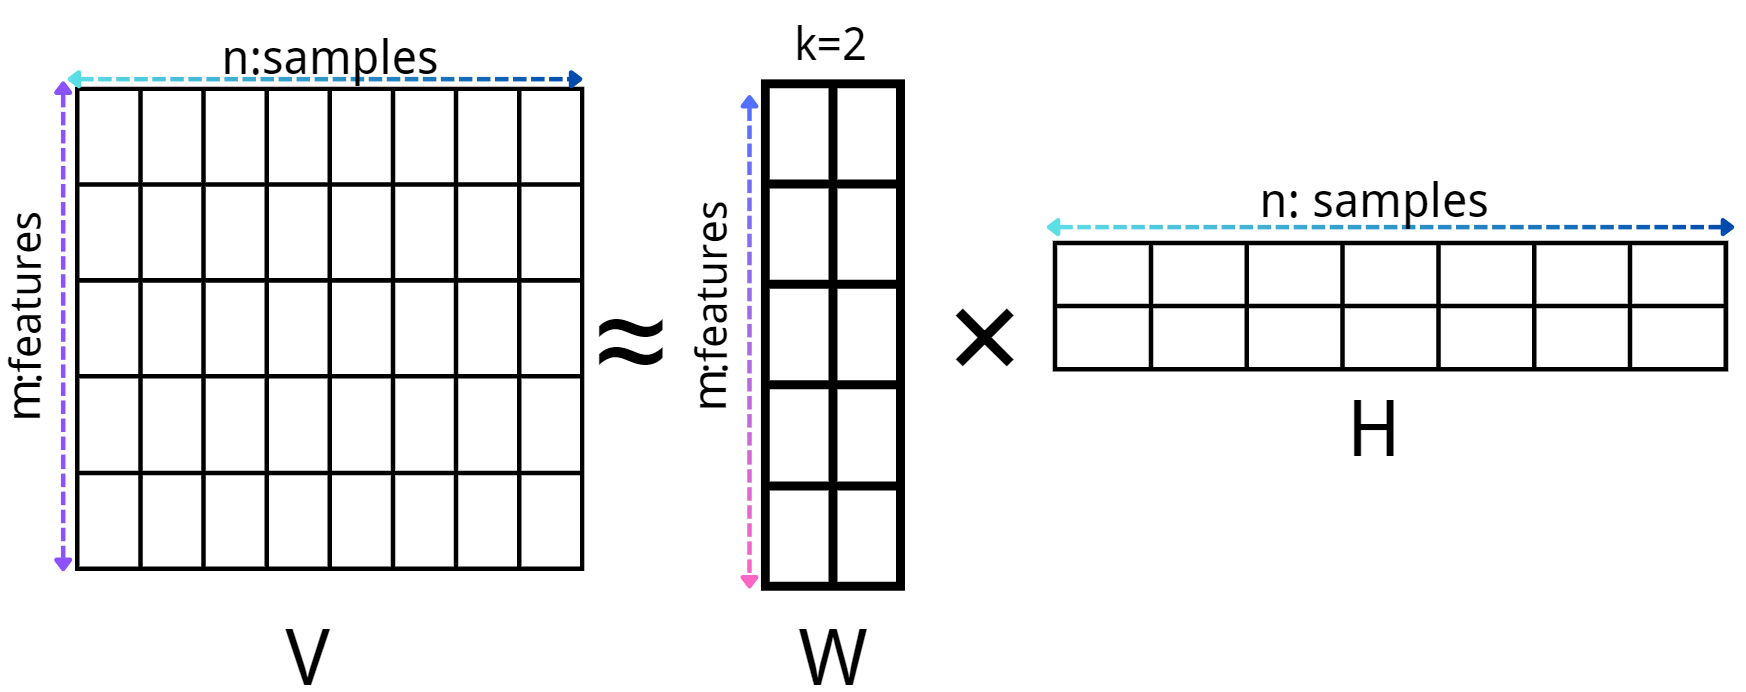
##### where:
   
-  **V**  is the <u>**original non-negative matrix ** </u> 
$ V_{m \times n} $.
    **$ m $**  represents the number of features.
    **$ n $**   represents the number of samples.


-  **W**  is the basis matrix $ W_{m \times k} $.

-  **H** is the coefficient matrix **k** is the number of latent features, <span style="color:Purple">$ H_{k \times n}( k \ll \min(m, n) )$.




The objective is to minimize the **reconstruction error**, often measured using the **Frobenius norm**:</span>

$$ \min_{W, H} \| V - WH \|_F $$</span>


The **Frobenius norm** is defined as:</span>
$$ \| A \|_F = \sqrt{\sum_{i,j} a_{ij}^2} $$</span>




##  


## 🦅2.1.2 NMF Tutorial


##  🎬Example data

  ❓Question:  In this $ V_{m \times n}$ below, $m $= ?, $n$=? (**$ m $** : the number of features/genes.**$ n $** : the number of samples.)

We will use the dataset below, which contains 5 samples and 10 features. The values represent normalized gene expression levels:

In [15]:
import numpy as np
np.random.seed(0)
V = np.abs(np.random.randn(10, 5))

import pandas as pd
df_V = pd.DataFrame(V, columns=[f"Sample{i+1}" for i in range(5)], index=[f"Gene{i+1}" for i in range(10)])
df_V

,Sample1,Sample2,Sample3,Sample4,Sample5
Gene1,1.764052,0.400157,0.978738,2.240893,1.867558
Gene2,0.977278,0.950088,0.151357,0.103219,0.410599
Gene3,0.144044,1.454274,0.761038,0.121675,0.443863
Gene4,0.333674,1.494079,0.205158,0.313068,0.854096
Gene5,2.552990,0.653619,0.864436,0.742165,2.269755
Gene6,1.454366,0.045759,0.187184,1.532779,1.469359
Gene7,0.154947,0.378163,0.887786,1.980796,0.347912
Gene8,0.156349,1.230291,1.202380,0.387327,0.302303
Gene9,1.048553,1.420018,1.706270,1.950775,0.509652
Gene10,0.438074,1.252795,0.777490,1.613898,0.212740


## 🎬 Step1 Construct an NMF model
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

Fisrt we should import `NMF`function from the `sklearn` package
```python
from sklearn.decomposition import NMF
```
Next we will use the `NMF` fuction to construct the NMF model:
```python
 NMF(n_component= ,init=' ', random_date= )
```
- `n_components=2` means we can reduce the data to 2 features.

-  `init`Determines the initialization method for the NMF algorithm.
  `init='random'` initializes the matrices with random values.
 
-  `random_state` Controls the seed of the random number generator for reproducibility.
 `random_state=0` ensures that the random initialization produces the same result every time you run the code.


In [24]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=2, init='random', random_state=0)
nmf_model

NMF(init='random', n_components=2, random_state=0)

## 🎬 Step2 Calculate  H
From the H matrix, we can observe the similarity of each sample in the new feature space, which is useful for subtypes classification.

- We can use `.components_` in` NMF `function to calculate $H$ :
```python
W = [model_name].fit_transform(V)
H = [model_name].components_
```




In [25]:
W = nmf_model.fit_transform(df_V)
H = nmf_model.components_
H

array([[1.54192196, 0.16780448, 0.40338155, 1.00166182, 1.43464264],
       [0.        , 0.90839068, 0.70853556, 0.73667262, 0.00272227]])

## 🎬 Step 3 Create a dataframe for H

##### Example code📋 
The obtained $H$ is a numerical matrix.  To make the matrix accessible for integration with other datasets, it is necessary to convert $H$ into a DataFrame format.

- `index=[data frame].index`:This is to ensure that the data is aligned with the column names of the data frame.
- `column=[data frame].column`:This is to ensure that the data is aligned with the row names of the data frame.
- `index=['Component1','Component2']`:This is to add column names to the two principal components. 


In [26]:
df_H = pd.DataFrame(H, columns=df_V.columns,index=['Component1','Component2'])
df_H.T

,Component1,Component2
Sample1,1.541922,0.000000
Sample2,0.167804,0.908391
Sample3,0.403382,0.708536
Sample4,1.001662,0.736673
Sample5,1.434643,0.002722


## 2.2 NMF exmaple

In [102]:
# Data Loading
import pandas as pd
base_url = "https://raw.githubusercontent.com/WanbingZeng/OMINEX/main/data/"
x1 = pd.read_csv(base_url + "COREAD_gex.csv", index_col=0).T
x2 = pd.read_csv(base_url + "COREAD_mu.csv", index_col=0).T
x2[x2 > 0] = 1 
x3 = pd.read_csv(base_url + "COREAD_cn.csv", index_col=0).T
covariates = pd.read_csv(base_url+"COREAD_subtypes.csv", index_col=0, header=0)
covariates=covariates['subtypes']

In [81]:
# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x1_minmax = pd.DataFrame(scaler.fit_transform(x1), index=x1.index, columns=x1.columns)
combined_data=pd.concat([x1,x2,x3],axis=1)
combined_data=combined_data.T

In [82]:
# NMF Implementation
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=2, init='random', random_state=0)
nmf_model
W = nmf_model.fit_transform(combined_data)
H = nmf_model.components_
df_H = pd.DataFrame(H, columns=combined_data.columns,index=['Component1','Component2'])
df_H.T

C:\Users\zhanglingling\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


,Component1,Component2
Case1,1.968945,2.241009
Case2,1.964552,2.310771
Case3,1.844928,2.358723
Case4,1.829845,2.486068
Case5,2.342102,1.580406
...,...,...
Case117,2.030914,2.403175
Case118,2.317726,2.047818
Case119,1.930122,2.497104
Case120,2.020338,2.281886


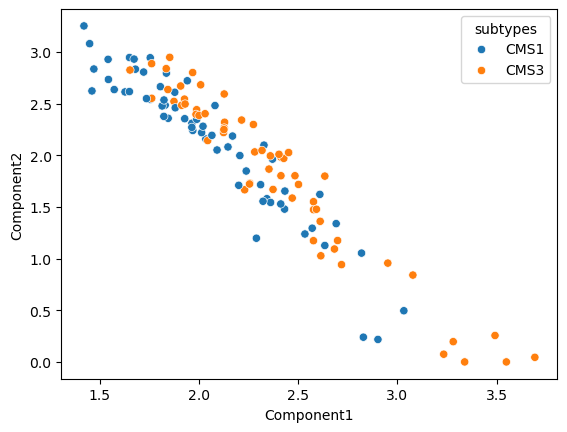

In [86]:
# Visualization 1
import seaborn as sns
import matplotlib.pyplot as plt
# Scatter Plot
df_H_subtype =pd.concat([df_H.T,covariates],axis=1)
sns.scatterplot(df_H_subtype, x="Component1", y="Component2",hue="subtypes")
plt.show()

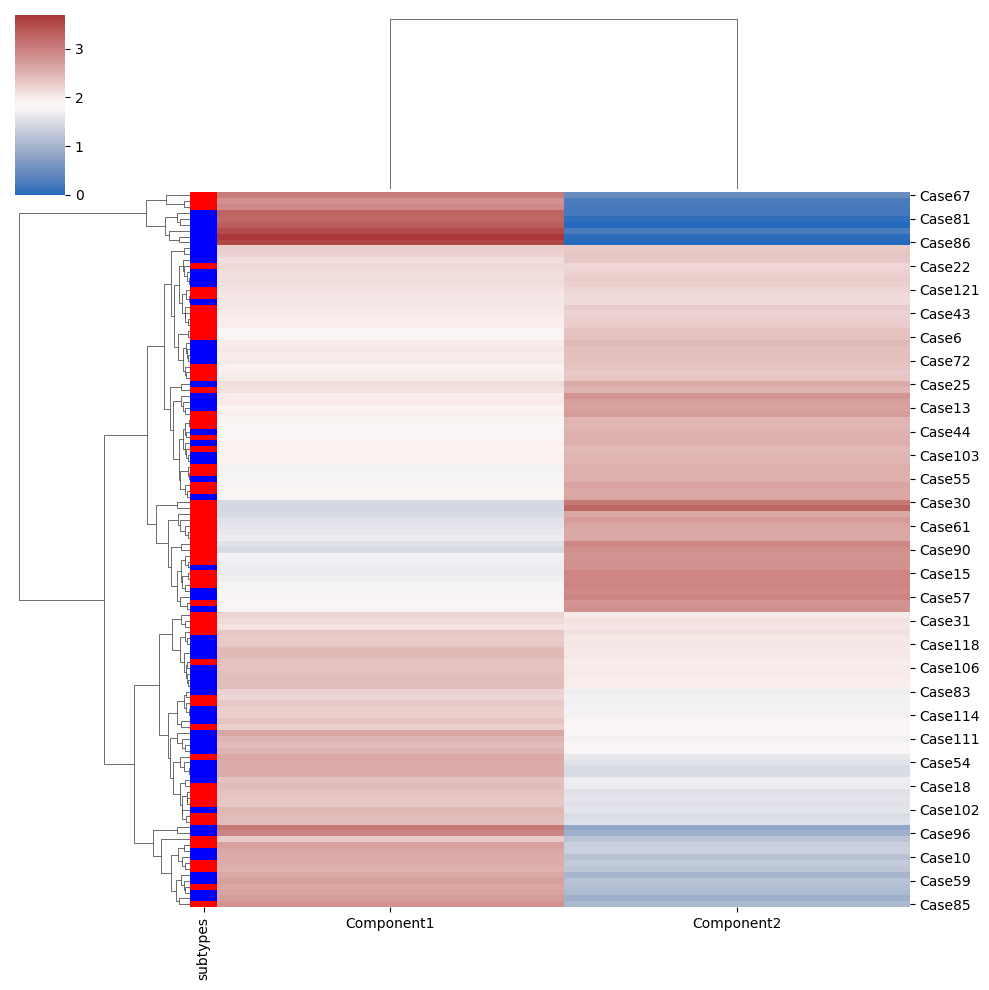

In [108]:
# Visualisasion 2
subtype_colors = {'CMS1': 'red', 'CMS3': 'blue'}
row_colors =df_H_subtype['subtypes'].map(subtype_colors)
sns.clustermap(df_H.T, metric="euclidean", method="average", cmap="vlag",row_colors=row_colors)
plt.show()


##  


## 🦅2.3 Exercises

### E1: Can you normalize the data with Frobenius norm for the Colorectal Cancer dataset to improve classification accuracy?


In [ ]:
#

### E2: Use the dataset of  Breast Cancer below to conduct a NMF analysis


##### If you have any problems, check[🎬 Step1 Construct an NMF model](#🎬-Step1-Construct-an-NMF-model)
(In this case, the data of CNV has been normalised.)

In [109]:
base_url = "https://raw.githubusercontent.com/WanbingZeng/OMINEX/main/data/"
x1 = pd.read_csv(base_url + "BRCA_gex.csv", index_col=0).T
x2 = pd.read_csv(base_url + "BRCA_mu.csv", index_col=0).T
x3 = pd.read_csv(base_url + "BRCA_cn.csv", index_col=0).T
covariates = pd.read_csv(base_url+"BRCA_subtypes.csv", index_col=0, header=0)
covariates=covariates['subtypes']

## 🔑

In [112]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
base_url = "https://raw.githubusercontent.com/WanbingZeng/OMINEX/main/data/"
x1 = pd.read_csv(base_url + "COREAD_gex.csv", index_col=0).T
x2 = pd.read_csv(base_url + "COREAD_mu.csv", index_col=0).T
x3 = pd.read_csv(base_url + "COREAD_cn.csv", index_col=0).T
covariates = pd.read_csv(base_url+"COREAD_subtypes.csv", index_col=0, header=0)
covariates=covariates[['subtypes']]
scaler = StandardScaler()
x1_standardized = pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns, index=x1.index)
def split_neg_pos(df):
    df_pos = df.clip(lower=0)
    df_neg = (-df.clip(upper=0)).rename(lambda x: x+'_neg', axis=1)
    return pd.concat([df_pos, df_neg], axis=1)
x1_split = split_neg_pos(x1_standardized)
x1_split 
encoder_x2 = OneHotEncoder()# x2: one-hotecncoder
x2_encoded = encoder_x2.fit_transform(x2).toarray()
x2_encoded_df = pd.DataFrame(x2_encoded, index=x2.index, columns=encoder_x2.get_feature_names_out(x2.columns))

In [132]:
combined_data = pd.concat([x1_split, x2_encoded_df, x3], axis=1)
combined_data=combined_data.T
nmf_model = NMF(n_components=2, init='random', random_state=0)
W = nmf_model.fit_transform(combined_data.values)
H = nmf_model.components_
components_df = pd.DataFrame(H.T, index=combined_data.columns, columns=['Component1', 'Component2'])
components_df

,Component1,Component2
Case1,0.097134,0.750645
Case2,0.001576,0.827855
Case3,0.037044,0.899116
Case4,0.000000,0.637244
Case5,0.397928,0.421319
...,...,...
Case117,0.135814,0.788139
Case118,0.156306,0.631000
Case119,0.000000,0.699279
Case120,0.000000,0.577677


## 📐Scatter Plot of NMF Components with Subtypes

In [120]:
import plotly.express as px
import pandas as pd
components_df_subtype = pd.concat([components_df, covariates], axis=1)

fig = px.scatter(components_df_subtype, x="Component1", y="Component2", color="subtypes", 
                 title="Scatter Plot of Components with Subtypes",
                 labels={"Component1": "Component 1", "Component2": "Component 2", "subtypes": "Subtypes"})
fig.show()

C:\Users\zhanglingling\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



##### 📝Interpretation
The scatter plot displays the relationship between two NMF components for various genomic regions, such as 15q14 and 7q36.2. The x-axis represents Component 1, and the y-axis represents Component 2. Each point corresponds to a genomic region, with different colors indicating different regions. The plot reveals how these regions cluster or spread based on their NMF component values, highlighting patterns and potential groupings within the genomic data.







The scatter plot displays the two components derived from Non-negative Matrix Factorization (NMF) for a set of cases (samples). The x-axis represents Component1, and the y-axis represents Component2. Each point in the plot corresponds to a case, with colors indicating different subtypes (CMS1 and CMS3).

##### Key Observations

###### Component Distribution

- The majority of the points are clustered near the lower values of Component1, indicating that many cases have similar characteristics in terms of Component1.
- Component2 shows a wider spread, suggesting more variability among the cases.

###### Subtype Separation

- CMS1 cases are colored blue, while CMS3 cases are colored red.
- There is an observable pattern where CMS1 and CMS3 cases are interspersed among each other. However, some regions show a higher concentration of one subtype over the other.

###### Clustering

- Certain clusters of points can be observed, indicating that specific groups of cases have similar characteristics in both components.


## 📐Hierarchically-clustered Heatmap

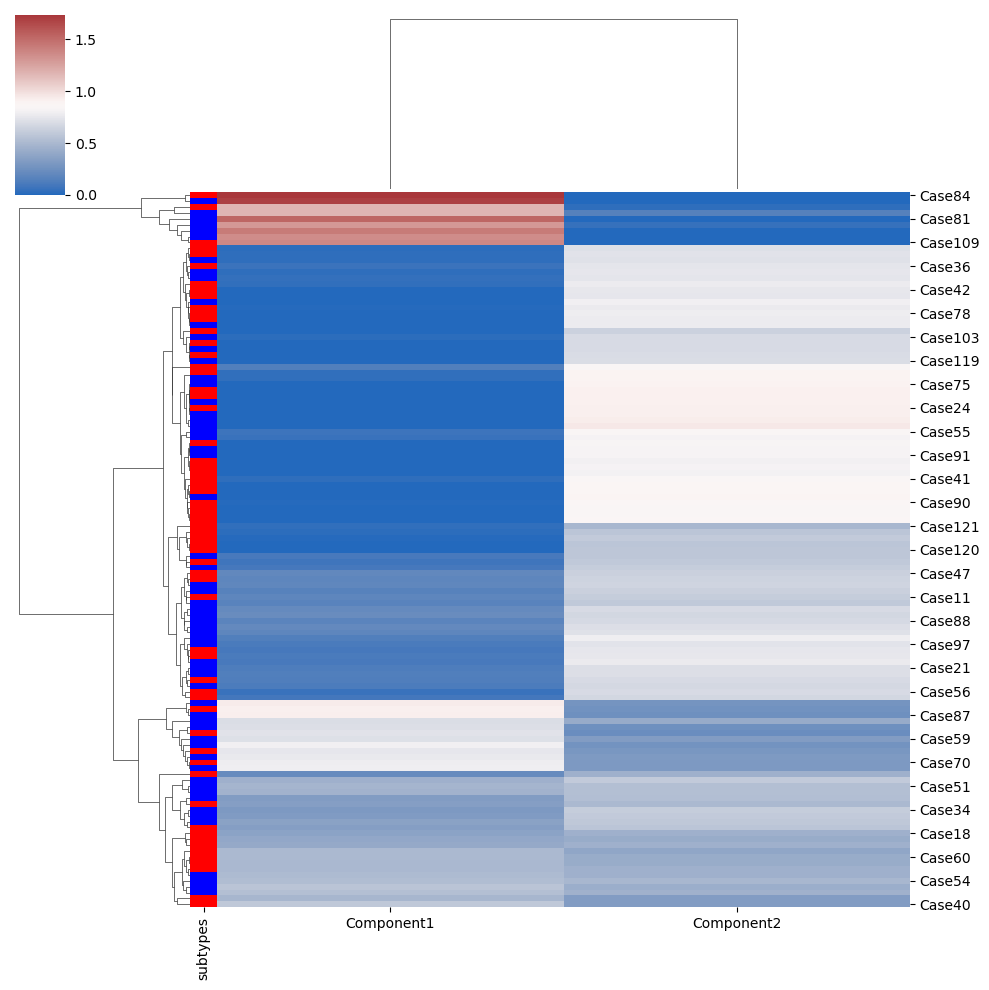

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
subtype_colors = {'CMS1': 'red', 'CMS3': 'blue'}
row_colors =components_df_subtype['subtypes'].map(subtype_colors)
sns.clustermap(components_df, metric="euclidean", method="average", cmap="vlag",row_colors=row_colors)
plt.show()

##### 📝Interpretation


The heatmap shown in the figure represents the hierarchical clustering of Non-negative Matrix Factorization (NMF) components for a set of cases (samples). The heatmap includes both component values and annotations for sample subtypes (CMS1 and CMS3).This heatmap provides a comprehensive view of the NMF components and their relationship to sample subtypes. By combining hierarchical clustering and subtype annotations, it allows for a detailed analysis of the data, highlighting patterns and similarities that may be important for further research or clinical applications.


###### Component1 and Component2
- The heatmap shows the values of Component1 and Component2 for each case. The distribution of colors indicates how each case is represented by these components.
- Cases with similar NMF component values are grouped together, making it easier to identify patterns and similarities among the cases.

###### Subtype Patterns
- The color bars indicate that there are regions where CMS1 (red) and CMS3 (blue) subtypes are more concentrated, suggesting potential subtype-specific patterns in the NMF components.
- For example, certain clusters may predominantly consist of CMS1 cases, while others are a mix of CMS1 and CMS3.

###### Clustering Insights
- The hierarchical clustering dendrograms show the relationships between samples and components. The closer the branches, the more similar the samples or components are to each other.
- This clustering can provide insights into the underlying structure of the data, potentially revealing distinct groups or clusters within the dataset.


## 2.2 iNMF

In [16]:
# ## 2.2 Visualization 

# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import linkag
# # Add colors to the subtypes and map them to the samples.
# subtype_colors = {'CMS1': 'blue', 'CMS3': 'red'}
# row_colors =covariates['subtypes'].map(subtype_colors)
# sns.clustermap(df_factors, metric="euclidean", method="average", cmap="vlag",row_colors=row_colors)
# plt.show()